# Helper functions

In [2]:
def split_dir_to_train_test_val(directory = "../data/clothes",
                            train_size = 0.7,
                            test_size = 0.2,
                            val_size = 0.1):
  """
  Creates 3 folders for Train, Test and Validation data
  """
  import os
  import random
  import shutil

  # Set random seed
  rng = random.Random(42)

  for root, folders, files in os.walk(directory):
    for folder in folders:
      # Create list of the files
      list_of_files = []
      for file_name in os.listdir(root+folder+"/"):
        list_of_files.append(file_name)
      
      #  Shuffle the list
      rng.shuffle(list_of_files)

      # Create lists of files
      train_files = list_of_files[:int(len(list_of_files)*train_size)]
      test_files = list_of_files[int(len(list_of_files)*train_size) : int(len(list_of_files)*(train_size+test_size))]
      val_files = list_of_files[int(len(list_of_files)*(train_size+test_size)):]

      # Create folders and files for train data
      for one_file in train_files:
      
        # Copy  files
        dest_dir = "../data/preprocessed/train/"+folder+"/"
        os.makedirs(dest_dir, exist_ok=True)

        shutil.copy2(src=(root+folder+"/"+one_file),
                    dst=(dest_dir+one_file))
      print(f"Folder {folder}. Train data copied. {len(train_files)} files")

      # Create folders and files for test data
      for one_file in test_files:      
        # Copy  files
        dest_dir = "../data/preprocessed/test/"+folder+"/"
        os.makedirs(dest_dir, exist_ok=True)

        shutil.copy2(src=(root+folder+"/"+one_file),
                    dst=(dest_dir+one_file))
      print(f"Folder {folder}. Test data copied. {len(test_files)} files")

      # Create folders and files for validation data
      for one_file in val_files:
      
        # Copy  files
        dest_dir = "../data/preprocessed/validation/"+folder+"/"
        os.makedirs(dest_dir, exist_ok=True)

        shutil.copy2(src=(root+folder+"/"+one_file),
                    dst=(dest_dir+one_file))
      print(f"Folder {folder}. Validation data copied. {len(val_files)} files")
      
     


def get_class_names_from_folder(directory):
  """
  Get the classnames from train folder for example
  """
  import pathlib
  import numpy as np
  data_dir = pathlib.Path(directory)
  class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Created a list of class names 
  return class_names
  print(class_names)

In [3]:
# Split images to test, train, and validation
split_dir_to_train_test_val(directory='../data/clothes/',
                            train_size=0.7,
                            test_size=0.2,
                            val_size=0.1)

Folder Top. Train data copied. 26 files
Folder Top. Test data copied. 8 files
Folder Top. Validation data copied. 4 files
Folder Skirt. Train data copied. 103 files
Folder Skirt. Test data copied. 30 files
Folder Skirt. Validation data copied. 15 files
Folder Undershirt. Train data copied. 72 files
Folder Undershirt. Test data copied. 20 files
Folder Undershirt. Validation data copied. 11 files
Folder Longsleeve. Train data copied. 462 files
Folder Longsleeve. Test data copied. 132 files
Folder Longsleeve. Validation data copied. 67 files
Folder Dress. Train data copied. 216 files
Folder Dress. Test data copied. 62 files
Folder Dress. Validation data copied. 31 files
Folder Hoodie. Train data copied. 67 files
Folder Hoodie. Test data copied. 20 files
Folder Hoodie. Validation data copied. 10 files
Folder Polo. Train data copied. 80 files
Folder Polo. Test data copied. 23 files
Folder Polo. Validation data copied. 12 files
Folder Pants. Train data copied. 423 files
Folder Pants. Test da

# Get class names from folder

In [4]:
class_names = get_class_names_from_folder(directory="../data/preprocessed/train/")
class_names
len(class_names)

16

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random

In [6]:
def visualize_random_image(target_dir, target_class):
    """
    Visualize random image from target directory
    """
    image_dir = target_dir + target_class
    random_image = random.sample(os.listdir(image_dir), 1)

    img = mpimg.imread(image_dir + '/' + random_image[0])
    plt.title(target_class)
    plt.imshow(img)

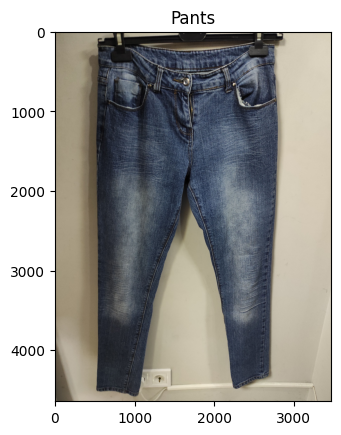

In [7]:
visualize_random_image('../data/preprocessed/test/', 'Pants')

# Create datasets from directories

In [8]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [9]:
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)
val_datagen = ImageDataGenerator(rescale=1/255.)

train_data = train_datagen.flow_from_directory(directory='../data/preprocessed/train',
                                               target_size=(240,240),
                                               batch_size=32,
                                               class_mode='categorical')

test_data = test_datagen.flow_from_directory(directory='../data/preprocessed/test',
                                               target_size=(240,240),
                                               batch_size=32,
                                               class_mode='categorical')

val_data = val_datagen.flow_from_directory(directory='../data/preprocessed/validation',
                                               target_size=(240,240),
                                               batch_size=32,
                                               class_mode='categorical')

Found 3249 images belonging to 16 classes.
Found 932 images belonging to 16 classes.
Found 474 images belonging to 16 classes.


# Create and fit the model

In [10]:
# Set random seed
tf.random.set_seed(42)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Input
from tensorflow.keras.optimizers import Adam

# create model
model = Sequential([
    Input(shape=(240,240,3)),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size=2),
    Flatten(),
    Dense(16, activation="softmax")
])

model.compile(loss="categorical_crossentropy",
             optimizer=Adam(),
             metrics=['accuracy'])


In [11]:
steps_per_epoch = train_data.n // train_data.batch_size
val_steps = val_data.n // val_data.batch_size

# Fit the model
history = model.fit(train_data,
                    batch_size=32,
                    epochs=6,
                    steps_per_epoch=steps_per_epoch,
                    validation_data=val_data,
                    validation_steps=val_steps)

Epoch 1/6


/Users/arveenazhand/Documents/repos/sparkfit-venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


101/101 ━━━━━━━━━━━━━━━━━━━━ 92s 859ms/step - accuracy: 0.2164 - loss: 2.9861 - val_accuracy: 0.4107 - val_loss: 2.1294
Epoch 2/6
  1/101 ━━━━━━━━━━━━━━━━━━━━ 17s 174ms/step - accuracy: 0.5000 - loss: 1.9262

2024-06-28 20:07:42.127441: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/opt/homebrew/Cellar/python@3.12/3.12.4/Frameworks/Python.framework/Versions/3.12/lib/python3.12/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5000 - loss: 1.9262 - val_accuracy: 0.3462 - val_loss: 2.4226
Epoch 3/6


2024-06-28 20:07:42.661306: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


101/101 ━━━━━━━━━━━━━━━━━━━━ 91s 852ms/step - accuracy: 0.4669 - loss: 1.8466 - val_accuracy: 0.4665 - val_loss: 1.9910
Epoch 4/6
  1/101 ━━━━━━━━━━━━━━━━━━━━ 15s 152ms/step - accuracy: 0.5312 - loss: 1.5941

2024-06-28 20:09:14.124248: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5312 - loss: 1.5941 - val_accuracy: 0.5769 - val_loss: 1.6453
Epoch 5/6


2024-06-28 20:09:14.686513: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


101/101 ━━━━━━━━━━━━━━━━━━━━ 93s 864ms/step - accuracy: 0.5965 - loss: 1.3450 - val_accuracy: 0.4754 - val_loss: 1.8375
Epoch 6/6
  1/101 ━━━━━━━━━━━━━━━━━━━━ 17s 178ms/step - accuracy: 0.6875 - loss: 1.1377

2024-06-28 20:10:47.503001: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6875 - loss: 1.1377 - val_accuracy: 0.6538 - val_loss: 1.3745


2024-06-28 20:10:48.004066: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


In [12]:
# evaluate model
model.evaluate(test_data)

30/30 ━━━━━━━━━━━━━━━━━━━━ 22s 722ms/step - accuracy: 0.4671 - loss: 1.8308


[1.8081282377243042, 0.473175972700119]

<Axes: >

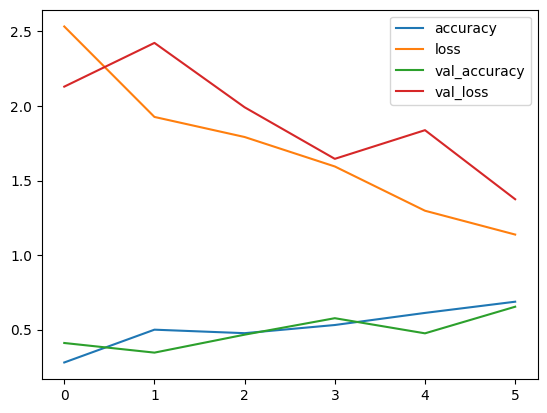

In [13]:
# plot learning curves
import pandas as pd

pd.DataFrame(history.history).plot()

In [14]:
# download image
!wget https://images.squarespace-cdn.com/content/v1/5ef3c9211ce67177992744ae/1594001915710-AN6W6OOS997B07GQCW3D/50+%283%29.jpg

def load_and_resize_image(filename, size):
    img = tf.io.read_file(filename)

    img = tf.image.decode_image(img)

    img = tf.image.resize(img, [size, size])

    img = img / 255

    return img

image = load_and_resize_image('test1.jpg', 240)

--2024-06-28 20:45:45--  https://images.squarespace-cdn.com/content/v1/5ef3c9211ce67177992744ae/1594001915710-AN6W6OOS997B07GQCW3D/50+%283%29.jpg
Resolving images.squarespace-cdn.com (images.squarespace-cdn.com)... 151.101.20.238
Connecting to images.squarespace-cdn.com (images.squarespace-cdn.com)|151.101.20.238|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 346190 (338K) [image/jpeg]
Saving to: ‘50+(3).jpg.1’

50+(3).jpg.1        100%[===================>] 338.08K  --.-KB/s    in 0.04s   

2024-06-28 20:45:45 (8.88 MB/s) - ‘50+(3).jpg.1’ saved [346190/346190]



In [15]:
pred = model.predict(tf.expand_dims(image, axis=0))
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


array([[6.2410845e-03, 1.1735981e-03, 1.0682107e-02, 4.4791340e-03,
        5.2814044e-02, 1.1112676e-01, 4.8542523e-01, 5.1964454e-02,
        1.7069936e-02, 2.3336197e-01, 3.1009121e-04, 2.3854361e-03,
        1.2535119e-02, 5.0120673e-04, 4.2857951e-03, 5.6439554e-03]],
      dtype=float32)

In [16]:
class_names[pred[0].argmax()]

'Outwear'

In [18]:
model.save('../models/classify_clothes.keras')